We start with the simplest possible example, which is the single chemical reaction:
$$
A \stackrel{k}{\longrightarrow} \emptyset
$$
where $A$ is the chemical species of interest and $k$ is the rate constant of the reaction. The symbol $\emptyset$ denotes chemical species that are of no further interest. The rate constant $k$ is defined so that $kdt$ gives the probability that a randomly chosen molecule of the chemical species $A$ reacts (is degraded) during the time interval $[t, t+d t)$. From here, we can deduce that:

$\begin{array}{ll}{\text { no reactions occur }} & {\text { with probability } 1-A(t) k \mathrm{d} t+O\left(\mathrm{d} t^{2}\right)} \\ {\text { exactly one reaction occurs }} & {\text { with probability } A(t) k \mathrm{d} t+O\left(\mathrm{d} t^{2}\right)} \\ {\text { two or more reactions occur }} & {\text { with probability } \quad O\left(\mathrm{d} t^{2}\right)}\end{array}$

If the time is t now, our goal is to compute the time $t+\tau$ when the next reaction takes place. And $\tau$ is a random variable. If we let:

- $g(A(t), s)$ be the probability that no reaction occurs in interval $[t, t+s),$ 

-  $f(A(t), s) \mathrm{d} s$ be the probability that, given A(t) molecules at time t in the system, the next reaction occurs during the time interval $[t+s, t+s+\mathrm{d} s)$

We have
$$
f(A(t), s) \mathrm{d} s=g(A(t), s) A(t+s) k \mathrm{d} s
$$
and 
$$
f(A(t), s) \mathrm{d} s=g(A(t), s) A(t) k \mathrm{d} s
$$
To calculate $g$, we notice that for and $\sigma>0$,
$$
g(A(t), \sigma+\mathrm{d} \sigma)=g(A(t), \sigma)[1-A(t+\sigma) k \mathrm{d} \sigma]
$$
*The product of the probability that no reaction occurs in the interval $[t, t+\sigma)$ and the probability that no reaction occurs in the interval $[t+\sigma, t+\sigma+\mathrm{d} \sigma) .$* Hence

$$
\frac{\operatorname{dg}(A(t), \sigma)}{\mathrm{d} \sigma}=-A(t) k g(A(t), \sigma)
$$

And,$g(A(t), \sigma)=\exp [-A(t) k \sigma]$. Now, we can write

$$
f(A(t), s) \mathrm{d} s=A(t) k \exp [-A(t) k s] \mathrm{d} s
$$

**Thus we have found that the time interval to the next reaction, $\tau$, is distributed according to the exponential distribution**

To use this in the simulation, we use the following **auxiliary function**:

$$
F(\tau)=\exp [-A(t) k \tau]=\int_{\tau}^{\infty} f(A(t), s) \mathrm{d} s
$$

representing the probability that the time to the next reaction
is greater than $\tau$. 

### Theorem 1:
**If $\tau$ is a random number in the interval $(0, \infty),$ then $F(\tau)$ is a random number uniformly distributed in the interval $(0,1) .$**

### Proof for theorem 1:
To show this let $0<a<b<1$ be chosen arbitrarily. The probability that $F(\tau) \in(a, b)$ is equal to the probability that $\tau \in\left(F^{-1}(b), F^{-1}(a)\right),$ which is
given by the integral of $f(A(t), s)$ over $s$ from $F^{-1}(b)$ to $F^{-1}(a) .$
$$
\begin{array}{l}{\int_{F^{-1}(b)}^{F^{-1}(a)} f(A(t), s) \mathrm{d} s=\int_{F^{-1}(b)}^{F^{-1}(a)} A(t) k \exp [-A(t) k s] \mathrm{d} s} \\ {\quad=-\int_{F^{-1}(b)}^{F^{-1}(a)} \frac{\mathrm{d} F}{\mathrm{d} s} \mathrm{d} s=-F\left[F^{-1}(a)\right]+F\left[F^{-1}(b)\right]=b-a}\end{array}
$$

### Algorithm based on Theorem 1
If we have an algorithm that generates a random number $r$ uniformly distributed on $(0,1),$ we can generate the time of the next reaction by setting
$$
r=F(\tau)=\exp [-A(t) k \tau]
$$
and 
$$
\tau=\frac{1}{A(t) k} \ln \left[\frac{1}{r}\right]
$$
Starting with $t=0$ and $A(0)=n_{0}$, we have the following algorithm:

1. Generate a random number r uniformly distributed in the interval (0, 1).

2. Compute the time when the next reaction occurs as $t+\tau$ 

3. Compute the number of molecules at time $t+\tau$ by $A(t+\tau)=A(t)-1$. Then continue with step 1

### Chemical Master equation

Let us denote by $p_{n}(t)$ the probability that there are $n$ molecules of $A$ at time $t$ in the system, i.e. $A(t)=n$. Let us consider an (infinitesimally) small time step $dt$ chosen such that *the probability that two molecules are degraded during $[t, t+\mathrm{d} t)$ is negligible compared to the probability that only one molecule is degraded during $[t, t+\mathrm{d} t) .$* Then there are two possible ways for $A(t+\mathrm{d} t)$ to take:**either $A(t)=n$ and no reaction occurred in $[t, t+\mathrm{d} t),$ or $A(t)=n+1$ and one molecule was degraded in $[t, t+\mathrm{d} t),$ i.e.**


$$
p_{n}(t+\mathrm{d} t)=p_{n}(t) \times(1-k n \mathrm{d} t)+p_{n+1}(t) \times k(n+1) \mathrm{d} t
$$

Passing to the time limit, we obtain the **chemical master equation**:

$$
\frac{\mathrm{d} p_{n}}{\mathrm{d} t}=k(n+1) p_{n+1}-k n p_{n}
$$

*Since $A(0)=n_0$, we have $p_{n} \equiv 0$ for $n>n_{0}$. And we now have a system of $n_0+1$ ODEs* We have initial condition as $p_{n_{0}}(0)=1$ ODE for $n_0$ gives:

$$
p_{n_{0}}(t)=\exp \left[-k n_{0} t\right]
$$

Using this formula, we have

$$
\frac{\mathrm{d}}{\mathrm{d} t} p_{n_{0}-1}(t)=k n_{0} \exp \left[-k n_{0} t\right]-k\left(n_{0}-1\right) p_{n_{0}-1}(t)
$$

with initial condition of $p_{n_{0}-1}(0)=0$, we find
$$
p_{n_{0}-1}(t)=\exp \left[-k\left(n_{0}-1\right) t\right] n_{0}(1-\exp [-k t])
$$
In general, we have

$$
p_{n}(t)=\exp [-k n t]\left(\begin{array}{c}{n_{0}} \\ {n}\end{array}\right)\{1-\exp [-k t]\}^{n_{0}-n}
$$

The mean value for the $A(t)$ is then:
$$
M(t)=\sum_{n=0}^{n_{0}} n p_{n}(t)=n_{0} \exp [-k t]
$$

### Deterministic description of the chemical reaction

Let us assume that the chemical species A is produced or destroyed according to k chemical reactions, which are labelled
from 1 to k. Then the time evolution of concentration a(t) is given by the ODE

$$
\frac{\mathrm{d} a}{\mathrm{d} t}=\sum_{i=1}^{k} c_{i} r_{i}
$$

where $r_{i}$ is the rate of the $i$ th reaction and $c_{i}$ is the change in the number of molecules of A corresponding to the occurrence of one ith reaction, i.e. it is the difference between the number (stoichiometric coefficient) in front of A on the right-hand side of the reaction and the corresponding stoichiometric coefficient on the left-hand side. For example, $c_{i}=-2$ for the reaction $A+A \rightarrow B$. Now, the rates $r_i(t)$ is just the product of the concentrations. For degradation reaction, it is just $a(t)$. Thus, we have an ODE for the degradation reaction:

$$
\frac{\mathrm{d} a}{\mathrm{d} t}=-k a
$$

where $a(t)=A(t) / v$ is the concentration of chemical species $A$ in a container of volume $v .$ Solving this equation with initial condition $a(0)=n_{0} / v,$ we obtain $a(t)=M(t) / v .$ In other words, the stochastic mean can be obtained by solving the corresponding deterministic ODE. However, we should emphasize that *this is not true for general systems of chemical reactions*.

In [2]:
import numpy as np
from numpy.random import uniform
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

def degrade(n0,k):
    tlst = [0]
    nlst = [n0]
    while nlst[-1]>0:
        rv = uniform()
        tau = 1/(nlst[-1]*k)*np.log(1/rv)
        tlst.append(tau+tlst[-1])
        nlst.append(nlst[-1]-1)
    return tlst,nlst

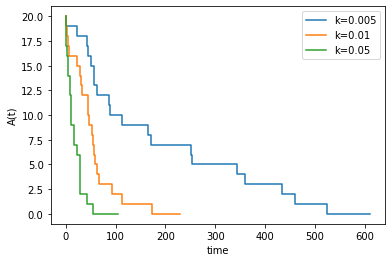

In [6]:
n0=20
k=0.005
Ts,ns = degrade(n0,k)
plt.step(Ts,ns,label='k={}'.format(k))
k=0.01
Ts,ns = degrade(n0,k)
plt.step(Ts,ns,label='k={}'.format(k))
k=0.05
Ts,ns = degrade(n0,k)
plt.step(Ts,ns,label='k={}'.format(k))
plt.xlabel('time')
plt.ylabel('A(t)')
plt.legend()

Now, let's verify the mean value with the analytical results

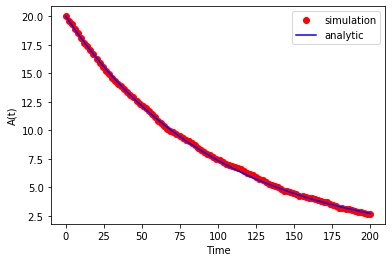

In [12]:
rep = 100
k=0.01
tmeasure = np.linspace(0,200,100)
avgs = np.zeros(100)
for i in range(rep):
    tsample, nsample = degrade(n0,k)
    tsample = np.array(tsample)
    for j,v in enumerate(tmeasure):
        avgs[j]+=nsample[np.where(tsample<=v)[0][-1]] # Poison process
avgs = avgs/rep
analytic = n0*np.exp(-k*tmeasure)
plt.plot(tmeasure,avgs,'ro',label='simulation')
plt.plot(tmeasure,analytic,'b-',label='analytic')
plt.xlabel('Time')
plt.ylabel('A(t)')
plt.legend()